## Problem Statement

### Predict from the current dataset that 
1. Customer will take personal loan or not
2. Target which segment of customer will accpect PL.(Feature Importance)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
dd = '''
Dataset Description
--------------------
ID: Customer ID
Age: Customer’s age in completed years
Experience: #years of professional experience
Income: Annual income of the customer (in thousand dollars)
ZIP Code: Home Address ZIP code.
Family: the Family size of the customer
CCAvg: Average spending on credit cards per month (in thousand dollars)
Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
Mortgage: Value of house mortgage if any. (in thousand dollars)
Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
Securities_Account: Does the customer have securities account with the bank?
CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
Online: Do customers use internet banking facilities?
CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?
'''

In [3]:
df = pd.read_csv('Loan_Modelling.csv',index_col='ID')

In [4]:
df.head(5)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
!pip install zipcodes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 546.9 KB


In [7]:
df.nunique()

Age                    45
Experience             47
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal_Loan           2
Securities_Account      2
CD_Account              2
Online                  2
CreditCard              2
dtype: int64

In [8]:
for col in df.columns:
    print(col,df[col].unique(),'',sep='\n-------------------------\n')

Age
-------------------------
[25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]
-------------------------

Experience
-------------------------
[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]
-------------------------

Income
-------------------------
[ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 

In [9]:
df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

### Data Preprocessing

In [10]:
df.dtypes

Age                     int64
Experience              int64
Income                  int64
ZIPCode                 int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [11]:
# in the experience column we can see -ve value as experience can't be -ve so we have to deal with it.

len(df[df['Experience']<0])

52

In [12]:
df[df['Experience']<0].head(4)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
ID,,,,,,,,,,,,,
90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0


In [13]:
df[df['Experience']<0].groupby(['Age'])['Experience'].describe().T

Age,23,24,25,26,28,29
count,12.000000,17.000000,18.000000,1.0,1.0,3.0
mean,-1.666667,-1.764706,-1.055556,-1.0,-2.0,-1.0
std,0.778499,0.664211,0.235702,NaN,NaN,0.0
min,-3.000000,-3.000000,-2.000000,-1.0,-2.0,-1.0
25%,-2.000000,-2.000000,-1.000000,-1.0,-2.0,-1.0
50%,-1.500000,-2.000000,-1.000000,-1.0,-2.0,-1.0
75%,-1.000000,-1.000000,-1.000000,-1.0,-2.0,-1.0
max,-1.000000,-1.000000,-1.000000,-1.0,-2.0,-1.0


In [14]:
df[df['Experience']==0].groupby(['Age'])['Experience'].describe().T

Age,24,25,26,27,29,30
count,11.0,17.0,28.0,8.0,1.0,1.0
mean,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,NaN,NaN
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df[df['Experience']<0].groupby(['Age','Education'])['Experience'].describe().T

Age              23                  24                       25       \
Education         1         2         1         2         3    1    2   
count      7.000000  5.000000  5.000000  6.000000  6.000000  4.0  4.0   
mean      -1.285714 -2.200000 -1.800000 -1.166667 -2.333333 -1.0 -1.0   
std        0.755929  0.447214  0.447214  0.408248  0.516398  0.0  0.0   
min       -3.000000 -3.000000 -2.000000 -2.000000 -3.000000 -1.0 -1.0   
25%       -1.000000 -2.000000 -2.000000 -1.000000 -2.750000 -1.0 -1.0   
50%       -1.000000 -2.000000 -2.000000 -1.000000 -2.000000 -1.0 -1.0   
75%       -1.000000 -2.000000 -2.000000 -1.000000 -2.000000 -1.0 -1.0   
max       -1.000000 -2.000000 -1.000000 -1.000000 -2.000000 -1.0 -1.0   

Age                    26   28   29  
Education          3    2    3    3  
count      10.000000  1.0  1.0  3.0  
mean       -1.100000 -1.0 -2.0 -1.0  
std         0.316228  NaN  NaN  0.0  
min        -2.000000 -1.0 -2.0 -1.0  
25%        -1.000000 -1.0 -2.0 -1.0  
50%        -1.000000 -1.0 -2.0 -1.0  
75%        -1.000000 -1.0 -2.0 -1.0  
max        -1.000000 -1.0 -2.0 -1.0

In [16]:
df[df['Experience']==0].groupby(['Age','Education'])['Experience'].describe().T

Age         24             25             26              27        29   30
Education    1    2    3    1    2    3    1    2     3    2    3    3    3
count      8.0  2.0  1.0  3.0  6.0  8.0  6.0  9.0  13.0  3.0  5.0  1.0  1.0
mean       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0
std        0.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  NaN  NaN
min        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0
25%        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0
50%        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0
75%        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0
max        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0

In [17]:
len(df[df['Experience']==0])

66

In [18]:
import zipcodes as zc

In [19]:
df['ZIPCode'].values

array([91107, 90089, 94720, ..., 93023, 90034, 92612], dtype=int64)

In [20]:
zc.matching('91107')[0]['county']

'Los Angeles County'

In [21]:
zc.list_all()

[{'zip_code': '00501',
  'zip_code_type': 'UNIQUE',
  'active': True,
  'city': 'Holtsville',
  'acceptable_cities': [],
  'unacceptable_cities': ['I R S Service Center'],
  'state': 'NY',
  'county': 'Suffolk County',
  'timezone': 'America/New_York',
  'area_codes': ['631'],
  'world_region': 'NA',
  'country': 'US',
  'lat': '40.8179',
  'long': '-73.0453'},
 {'zip_code': '00544',
  'zip_code_type': 'UNIQUE',
  'active': True,
  'city': 'Holtsville',
  'acceptable_cities': [],
  'unacceptable_cities': ['Irs Service Center'],
  'state': 'NY',
  'county': 'Suffolk County',
  'timezone': 'America/New_York',
  'area_codes': ['631'],
  'world_region': 'NA',
  'country': 'US',
  'lat': '40.7888',
  'long': '-73.0394'},
 {'zip_code': '00601',
  'zip_code_type': 'STANDARD',
  'active': True,
  'city': 'Adjuntas',
  'acceptable_cities': [],
  'unacceptable_cities': ['Colinas Del Gigante',
   'Jard De Adjuntas',
   'Urb San Joaquin'],
  'state': 'PR',
  'county': 'Adjuntas Municipio',
  'time

In [22]:
df['County'] = df['ZIPCode'].apply(lambda x: zc.matching(str(x))[0]['county'] if len(zc.matching(str(x))) else x)

In [23]:
df['County']

ID
1         Los Angeles County
2         Los Angeles County
3             Alameda County
4       San Francisco County
5         Los Angeles County
                ...         
4996           Orange County
4997        San Diego County
4998          Ventura County
4999      Los Angeles County
5000           Orange County
Name: County, Length: 5000, dtype: object

In [24]:
df['County'].value_counts()

Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              339
San Francisco County       257
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             114
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Kern County                 54
Marin County                54
San Luis Obispo County      33
Solano County               33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
92717                       22
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County             8
Tuolumne

### EDA

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [26]:
# for cols in df.columns:
#     print(cols,df[cols].value_counts())

#### Seaborn 

#### 1. Distribution Plots (Single Column Data, to visualize its distriubtion) 
    a. distplot 
    b. histplot 
    c. kdeplot 
    d. rugplot 
    e. displot 
    f. jointplot (two column data compared) 
    g. scatterplot (two column data compared) 
    


#### 2. Categorical (One Categorical column at-least) 
    a. countplot 
    b. barplot (one categorical along with one continuous numerical) 
    c. boxplot (one categorical along with one continuous numerical) 
    d. stripplot (one categorical along with one continuous numerical) 
    e. swarmplot (one categorical along with one continuous numerical) 
    f. violinplot (one categorical along with one continuous numerical) 


#### 3. Matrix 
    a. heatmap 
    b. clustermap 


#### 4. Regression Plot 
    a. regplot 
    b. lmplot 


#### 5. Grids 
    a. pairplot 
    b. PairGrid 
    c. JointGrid 
    d. FaceGrid

In [27]:
import seaborn as sns

##### Distribution Plots 

#### distplots --->  
    >> The y-axis represents the probability density.
    >> Probability density is the probability per unit on the x-axis
    
    How often" is the y-axis, the value is on the x axis.

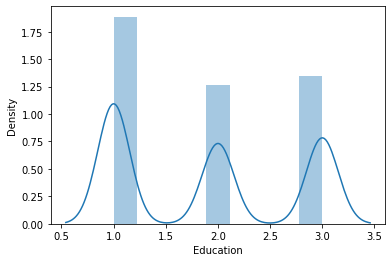

In [28]:
sns.distplot(df['Education'])

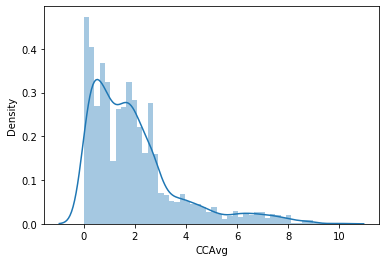

In [29]:
sns.distplot(df['CCAvg'])

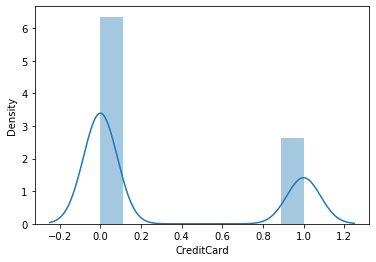

In [30]:
sns.distplot(df['CreditCard'])

#### histplot

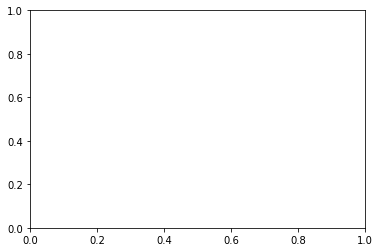

In [31]:
sns.histplot()

#### kdeplot

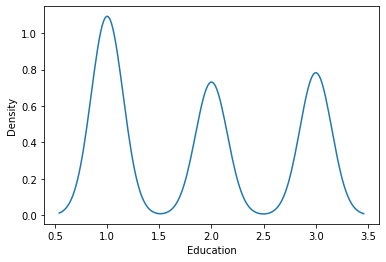

In [32]:
sns.kdeplot(df['Education'])

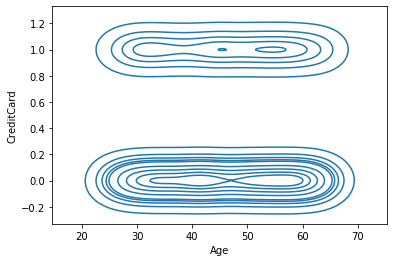

In [33]:
sns.kdeplot(df['Age'],df['CreditCard'])

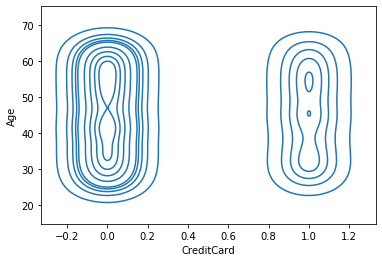

In [34]:
sns.kdeplot(df['CreditCard'],df['Age'],)

##### Categorical Plots

#### countplots

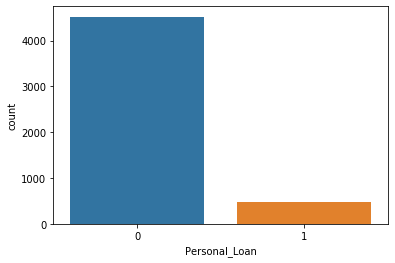

In [35]:
sns.countplot(x='Personal_Loan',data=df)

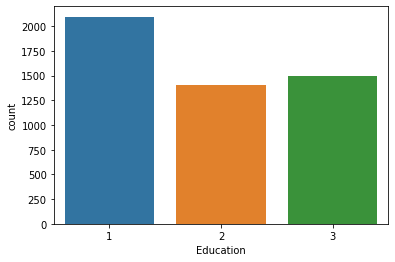

In [36]:
sns.countplot(x='Education',data=df)

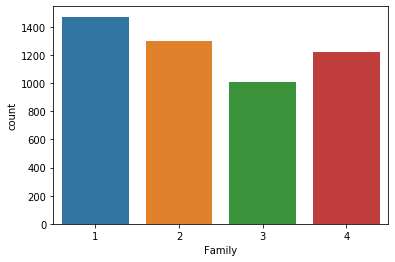

In [37]:
sns.countplot(x='Family',data=df)

In [38]:
df.head(2)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County
ID,,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Los Angeles County
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles County


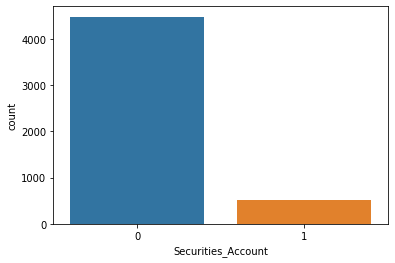

In [39]:
sns.countplot(x='Securities_Account',data=df)

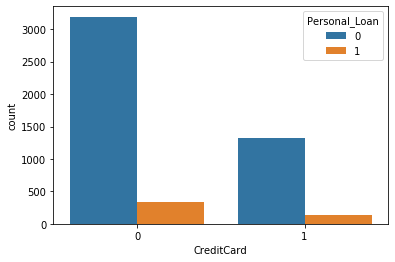

In [40]:
# using hue(only categorical data)for comparision

sns.countplot(x='CreditCard',data=df,hue='Personal_Loan')

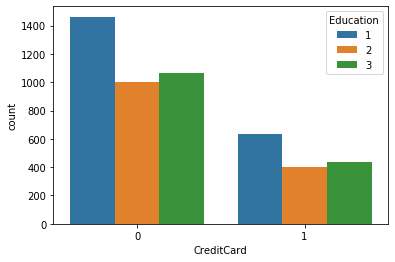

In [41]:
sns.countplot(x='CreditCard',hue = 'Education',data=df)

In [42]:
#Set_style --->> {'dark':'set background dark','darkgrid':'set background dark with grids','white':'set background white','tricks':'No change
sns.set_style('dark')

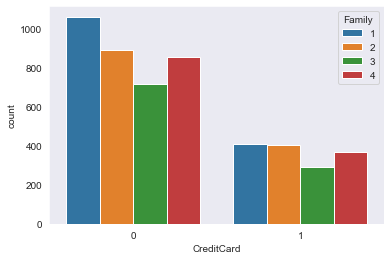

In [43]:
sns.countplot(x='CreditCard',hue = 'Family',data=df)

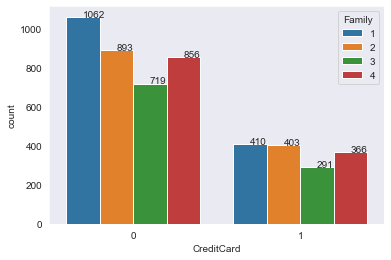

In [44]:
# Set the values(counts) on top of bars

f = sns.countplot(x='CreditCard',hue = 'Family',data=df,)
for i in f.patches:
    x = i.get_x() + i.get_width()/2
    y = i.get_y() + i.get_height()
    plt.annotate(i.get_height(),(x,y))


In [45]:
df.columns

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'County'],
      dtype='object')

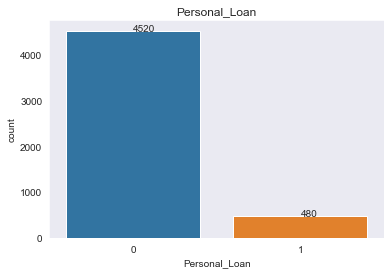

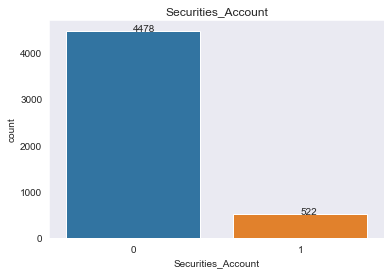

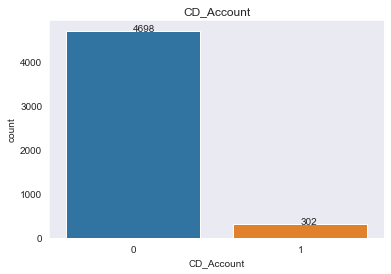

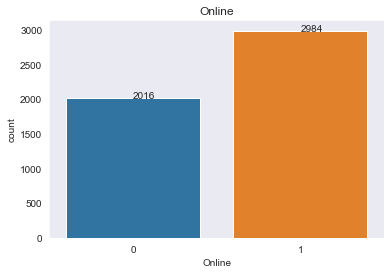

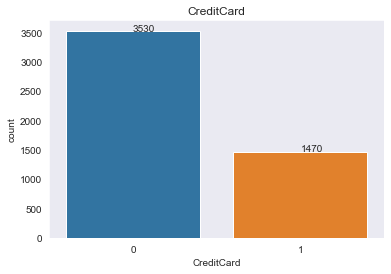

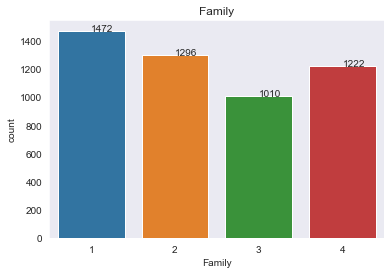

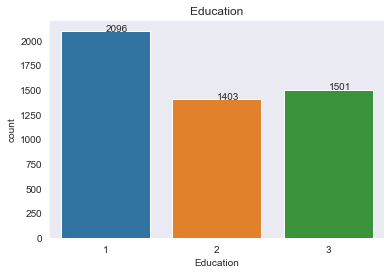

In [46]:
for cols in ['Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard','Family','Education']:
    f = sns.countplot(x=cols,data=df)
    plt.title(cols)
    for i in f.patches:
        x = i.get_x() + i.get_width()/2
        y = i.get_y() + i.get_height()
        plt.annotate(i.get_height(),(x,y))
    plt.show()

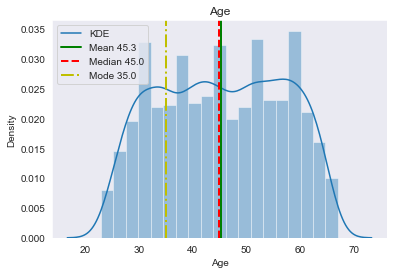

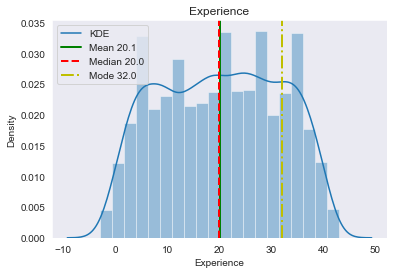

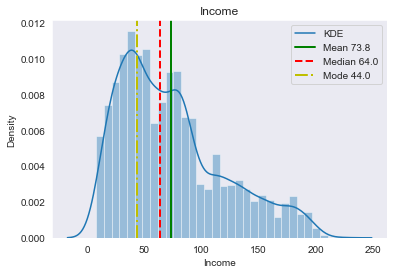

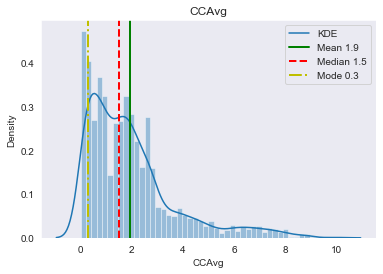

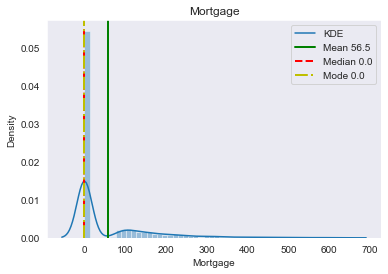

In [47]:
# Data visualization for continuous numerical data

for col in ['Age', 'Experience', 'Income','CCAvg','Mortgage']:

    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode().values[0]
    sns.distplot(df[col])
    plt.title(col)
    plt.axvline(mean,color = 'g',ls = '-',lw = 2) #axis vertical line
    plt.axvline(median,color ='r',ls = '--',lw=2)
    plt.axvline(mode,color ='y',ls = '-.',lw=2)
    plt.legend({'KDE':'','Mean %.1f'%mean:mean,'Median %.1f'%median:median,'Mode %.1f'%mode:mode,})
    plt.show()

In [48]:
# mode = df['Age'].mode().values[0]
# mode

##### Graphically study the classification of Personal Loan

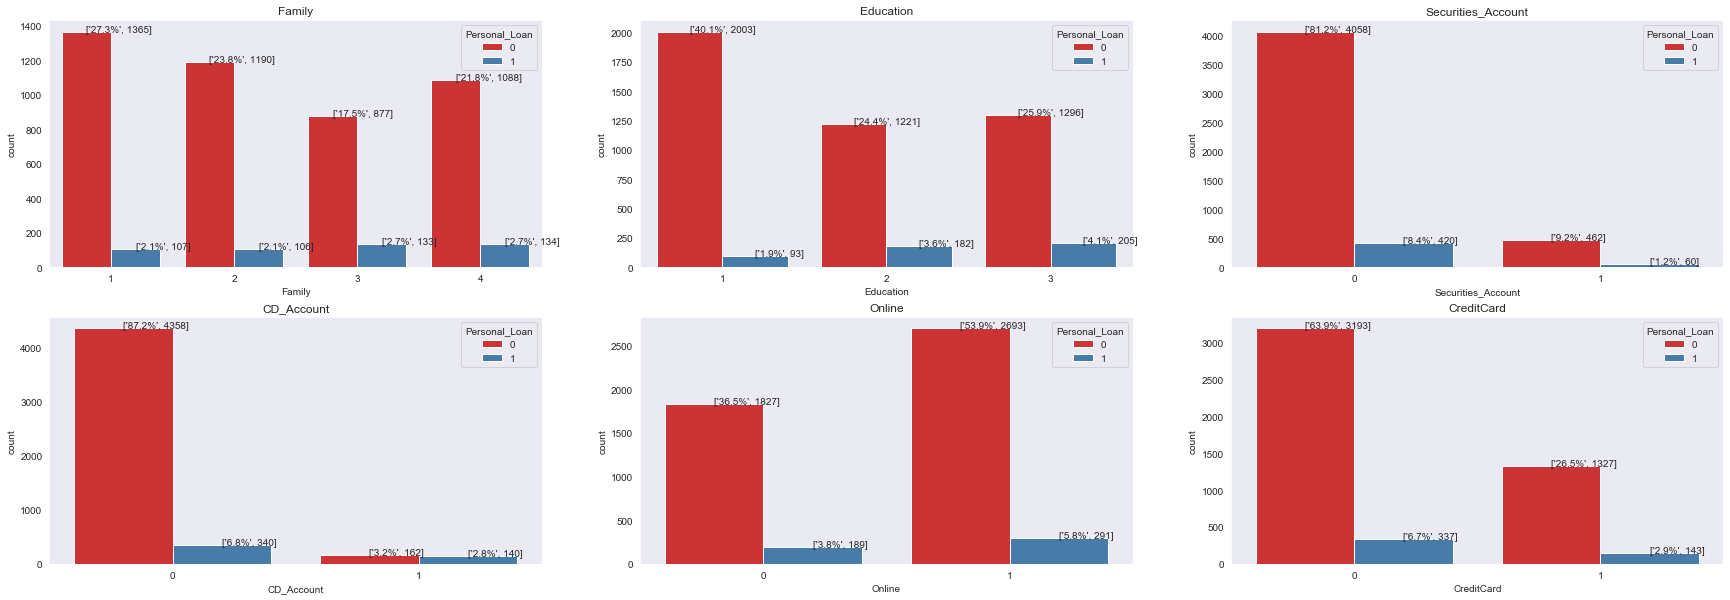

In [49]:
# comparision of classification data
plt.figure(figsize=(30,10))
sns.set_palette('Set1')
for i,col in enumerate(['Family','Education','Securities_Account','CD_Account','Online','CreditCard']):
    plt.subplot(2,3,i+1)
    ax = sns.countplot(x=col,data = df,hue='Personal_Loan')
    plt.title(col)
    for p in ax.patches:
        perc = '{:.1f}%'.format(100*p.get_height()/len(df[col]))
        x = p.get_x()+p.get_width() /2
        y = p.get_y()+p.get_height()
        plt.annotate([perc,p.get_height()],(x,y))
#         plt.annotate(p.get_height(),(x,y))


#### Observation:
    1.Categorical Data:
        Family --> family with 3 or 4 member --> PL
        Education --> Higher education (3) --> PL
        Securities_Account --> No Securities_Account(0) --> PL
        CD_Account --> No Certificate Deposit_Account(0) --> PL
        Online --> Online transcation(1) --> PL
        Credit Card --> No credit card(0) --> PL

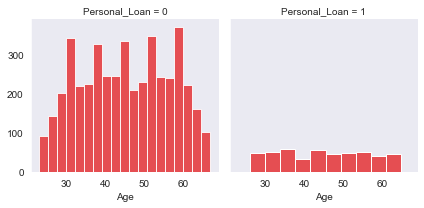

In [53]:
# comparision of continuous data

fg = sns.FacetGrid(data=df,col='Personal_Loan')
fg.map(sns.histplot,'Age')

In [51]:
# !pip install -U seaborn

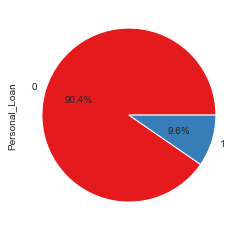

In [56]:
df['Personal_Loan'].value_counts().plot.pie(autopct='%1.1f%%')

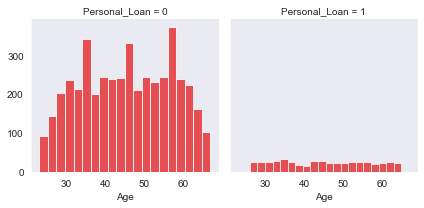

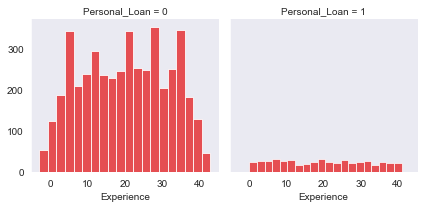

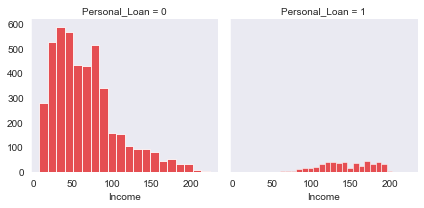

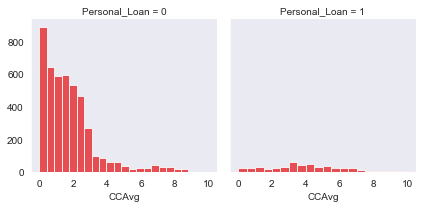

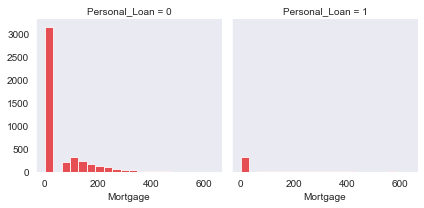

In [58]:
sns.set_palette('Set1')
for col in ['Age','Experience','Income','CCAvg','Mortgage']:
    fg = sns.FacetGrid(data=df,col='Personal_Loan')
    fg.map(sns.histplot,col,bins=20 )    
    plt.show()

#### Observation on continuous data:
    Age --> Every age group have -->PL
    Experience --> Every experience --> PL
    Income --> less than 85 --> No PL, more than 90-100 --> PL
    CCAvg --> less than 3 --> No PL , more than 4 --> PL
    Mortgage --> if any mortgage(mortgage>0) --> No PL


### Working on Outliers
    >> An outlier is an object that deviates significantly from the rest of the objects.
    
    >> An outlier is an observation that lies an abnormal distance from other values in a random sample from a population
    
    >> Multiplying the interquartile range (IQR) by 1.5 will give us a way to determine whether a certain value is an outlier. If we subtract 1.5 x IQR from the first quartile, any data values that are less than this number are considered outliers.

### --------------------------------------------------------------------------------

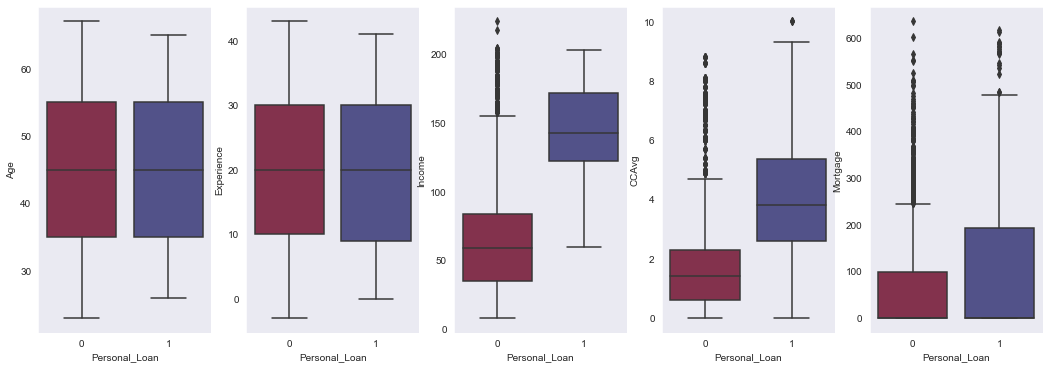

In [67]:
sns.set_palette('gist_stern')
plt.figure(figsize=(18,6))
for i,col in enumerate(['Age','Experience','Income','CCAvg','Mortgage']):
    plt.subplot(1,5,i+1)  
    sns.boxplot(x='Personal_Loan',y=col,data=df)


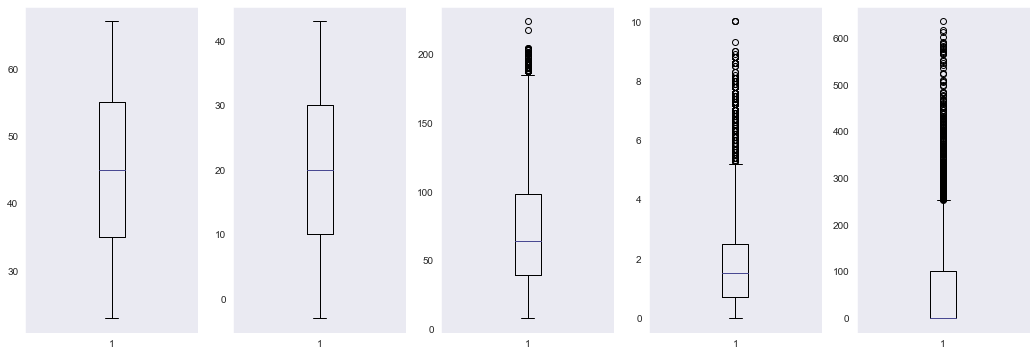

In [68]:
sns.set_palette('gist_stern')
plt.figure(figsize=(18,6))
for i,col in enumerate(['Age','Experience','Income','CCAvg','Mortgage']):
    plt.subplot(1,5,i+1)  
    plt.boxplot(x=df[col])

#### Observation:
    Age --> No outlier
    Experience --> No outlier
    Income --> Outliers in No PersonalLoan
    CCAvg --> Outliers in No PersonalLoan
    Morgage --> Outliers in either PersonalLoan


    

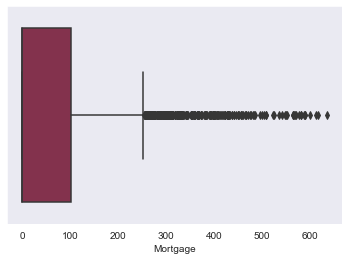

In [69]:
mortg_out = df['Mortgage']
sns.boxplot(x=mortg_out)

In [71]:
q1 = mortg_out.quantile(0.25)
q3 = mortg_out.quantile(0.75)
iqr = q3-q1
print(q1,q3,iqr)

0.0 101.0 101.0


In [73]:
min_q = q1 - 1.5*iqr
max_q = q3 + 1.5*iqr
print(min_q,max_q)

-151.5 252.5


In [74]:
mortg_fliter = mortg_out[(mortg_out>=min_q)&(mortg_out<=max_q)]

In [76]:
mortg_fliter.shape

(4709,)

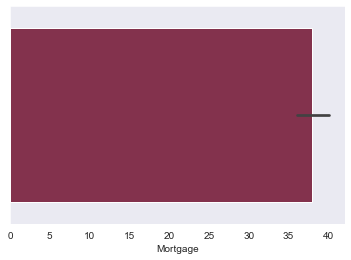

In [77]:
sns.barplot(x=mortg_fliter)

In [78]:
pd.crosstab(index=df['County'],columns=df['Personal_Loan'])

Personal_Loan,0,1
County,,
92634,5,0
92717,19,3
93077,1,0
96651,6,0
Alameda County,456,44
Butte County,17,2
Contra Costa County,73,12
El Dorado County,16,1
Fresno County,24,2


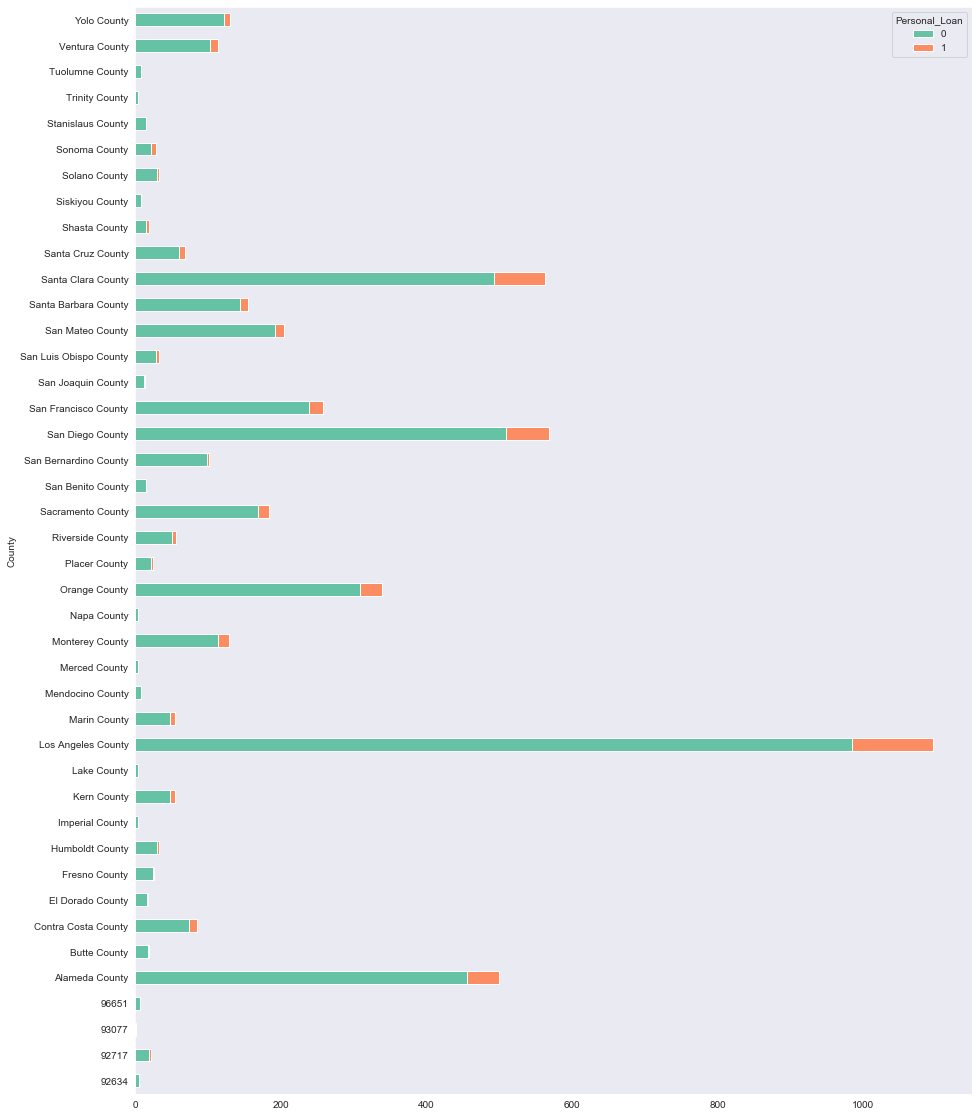

In [85]:
sns.set_palette('Set2')
# plt.figure(figsize=(15,6))
pd.crosstab(index=df['County'],columns=df['Personal_Loan']).plot(kind='barh',figsize=(15,20),stacked = True)

##### HeatMap

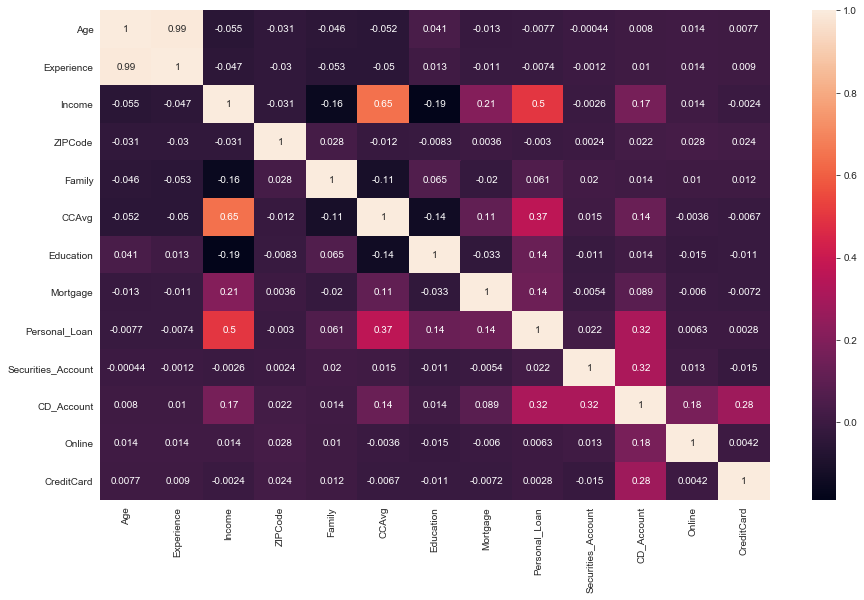

In [88]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

#### Observation:
    Age and Experience is very 99% corelated(close to unity) --> Can consider any one
    
    Correlation btw Personal Loan and:
        
        Age --> very less
        Income --> Highly correlated(0.5)
        Zipcode --> very less
        Family --> less correlated(0.061)
        CCAvg --> Highly correlated(0.37)
        Education --> correlated(0.14)
        Mortgage --> correlated(0.14)
        Securities Acc --> less correlated(0.022)
        CD_Acc --> Highly correlated(0.32)
        Online --> very correlated
        Credit card --> very less correlated

### Modelling

In [89]:
from sklearn.model_selection import train_test_split

In [92]:
df.columns

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'County'],
      dtype='object')

In [93]:
X = df.drop(['Personal_Loan','County'],axis=1)
y = df[['Personal_Loan']]

In [94]:
X.sample(3)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
ID,,,,,,,,,,,,
4113,34,9,65,95014,3,0.70,2,104,0,0,1,0
4079,36,12,58,91320,1,3.60,2,0,0,0,0,0
2197,51,24,189,95211,4,4.75,2,0,0,0,1,0


In [105]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [120]:
def create_model(X,y):
    xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size =0.25,random_state =101)
    model_dt = DecisionTreeClassifier().fit(xtrain,ytrain)
    model_rf = RandomForestClassifier().fit(xtrain,ytrain)
    print('Decision Tree')
    print('-'*20)
    print("Training Score",model_dt.score(xtrain,ytrain))
    print("Testing Score",model_dt.score(xtest,ytest))
    
    ypred_dt = model_dt.predict(xtest)
    cnf = pd.DataFrame(confusion_matrix(ytest,ypred_dt),index=['No','Yes'],columns= ['No','Yes'])
    sns.heatmap(cnf,annot=True,fmt='d',cbar=None,cmap='YlGn')
    plt.show()
    
    print()
    print('Random Forest')
    print('-'*20)
    print("Training Score",model_rf.score(xtrain,ytrain))
    print("Testing Score",model_rf.score(xtest,ytest))
    
    ypred_rf = model_rf.predict(xtest)
    cnf = pd.DataFrame(confusion_matrix(ytest,ypred_dt),index=['No','Yes'],columns= ['No','Yes'])
    sns.heatmap(cnf,annot=True,fmt='d',cbar=None,cmap='YlGn')
    
    
    return (model_dt,model_rf)

Decision Tree
--------------------
Training Score 1.0
Testing Score 0.9808


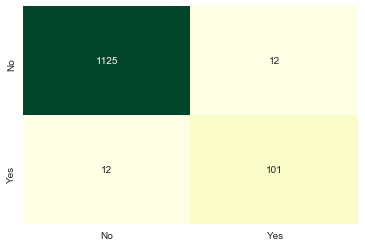


Random Forest
--------------------
Training Score 0.9981333333333333
Testing Score 0.9808


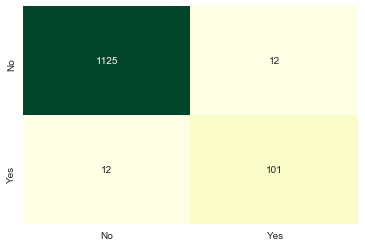

In [121]:
model_dt,model_rf = create_model(X,y)

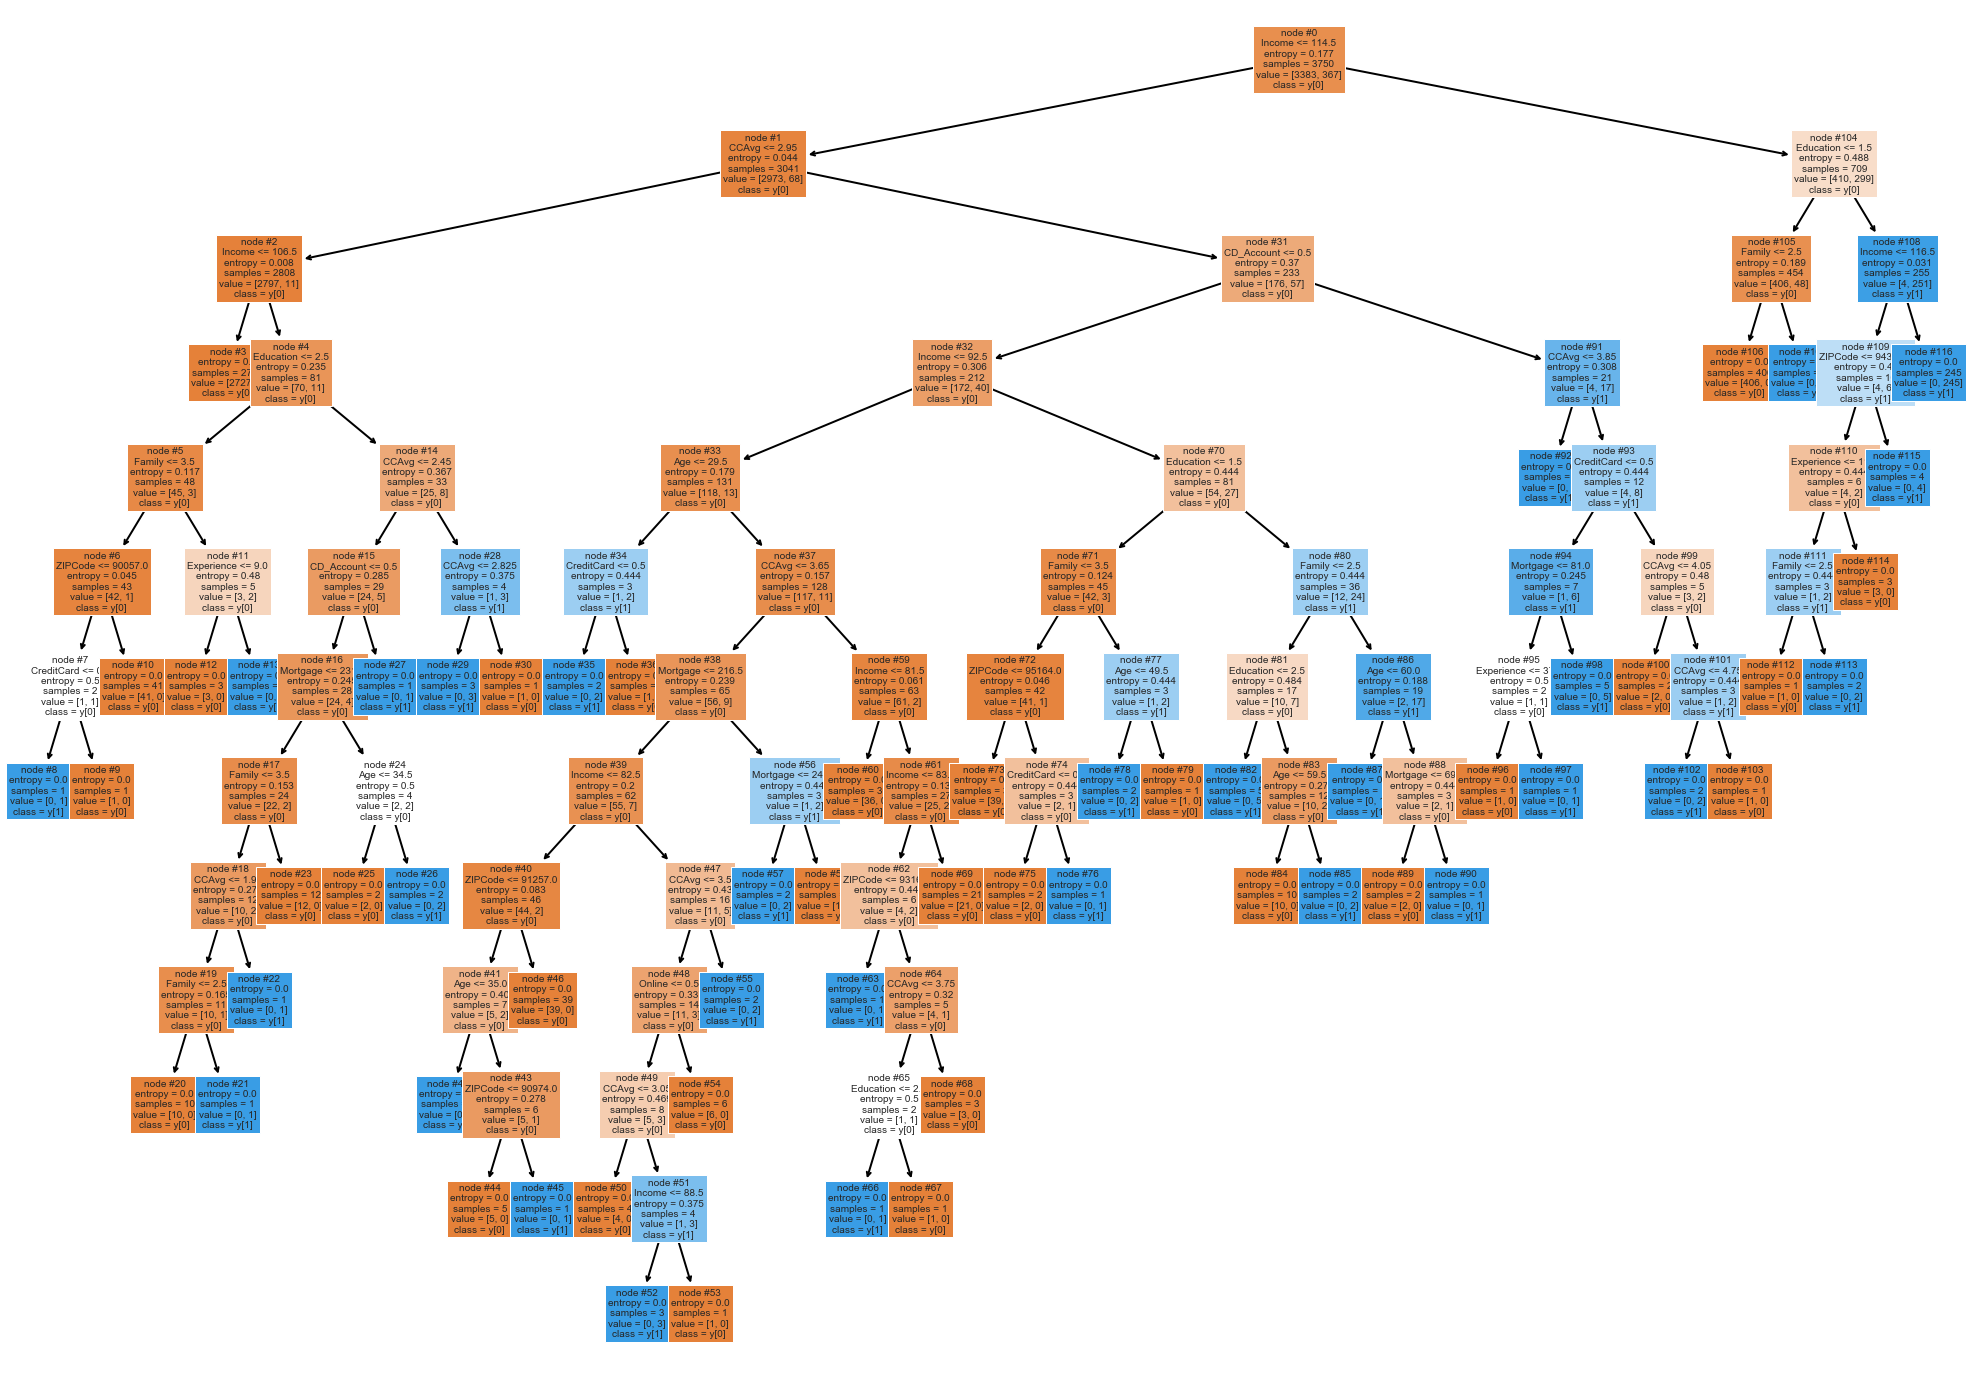

In [122]:
plt.figure(figsize=(35,25))
f = plot_tree(model_dt,feature_names=X.columns,fontsize=10,filled=True,node_ids=True,class_names=True)

for ff in f:
    arrow = ff.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(2)

In [123]:
model_dt_imp = pd.DataFrame(model_dt.feature_importances_,index=X.columns,columns=["Importance"])
model_dt_imp

,Importance
Age,0.018243
Experience,0.007148
Income,0.300955
ZIPCode,0.011188
Family,0.146650
CCAvg,0.059768
Education,0.413272
Mortgage,0.009554
Securities_Account,0.000000
CD_Account,0.024387


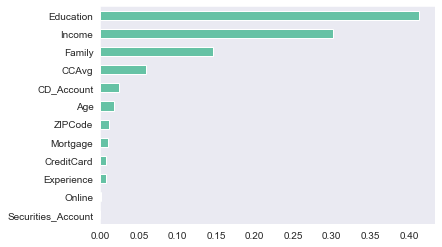

In [124]:
model_dt_imp['Importance'].sort_values().plot.barh()

In [128]:
X2 = df.drop(['Personal_Loan','County','Age'],axis=1)
y2 = df[['Personal_Loan']]

Decision Tree
--------------------
Training Score 1.0
Testing Score 0.9832


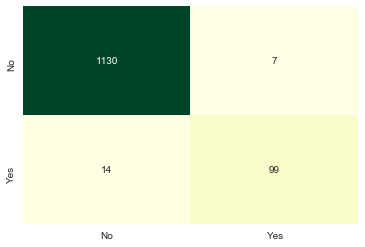


Random Forest
--------------------
Training Score 0.9976
Testing Score 0.9864


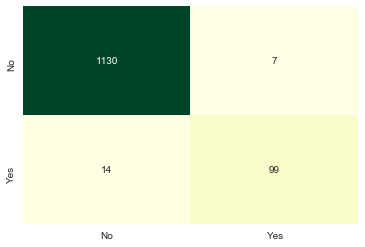

In [129]:
model_dt2 , model_rf2 = create_model(X2,y2)

In [130]:
X3 = df.drop(['Personal_Loan','County','Age','Online','Securities_Account'],axis=1)
y3 = df[['Personal_Loan']]

Decision Tree
--------------------
Training Score 1.0
Testing Score 0.9848


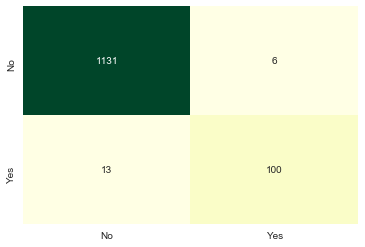


Random Forest
--------------------
Training Score 0.9989333333333333
Testing Score 0.9832


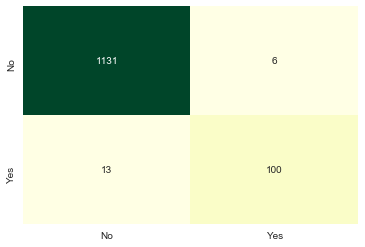

In [131]:
model_dt3 , model_rf3 = create_model(X2,y2)